<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



Run "pip3 install pandas matplotlib numpy tensorflow joblib scikit-learn" in terminal

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import joblib
from sklearn.preprocessing import MinMaxScaler

# Define start day to fetch the dataset from the yahoo finance library

---



In [43]:
df = pd.read_csv("StockHistoricalData/TSLA.csv")
print(df.head())


           Date    Open    High     Low   Close  Adj Close      Volume
0  Feb 27, 2026  402.94  407.12  398.11  402.51     402.51  56,760,900
1  Feb 26, 2026  414.42  416.81  403.66  408.58     408.58  53,602,500
2  Feb 25, 2026  412.15  420.34  412.15  417.40     417.40  54,809,700
3  Feb 24, 2026   399.5  410.82  397.64  409.38     409.38  58,579,500
4  Feb 23, 2026  407.29  407.70  394.04  399.83     399.83  69,680,000


In [44]:
df = df.drop(['Date','Adj Close'], axis = 1)

first = df.iloc[:1]
reversed_rest = df.iloc[1:][::-1].reset_index(drop=True)
df = pd.concat([first, reversed_rest], ignore_index=True)

df['Volume'] = (
    pd.to_numeric(
        df['Volume'].astype(str).str.replace(',', '', regex=False),
        errors='coerce'
    )
)

df = df.dropna(subset=['Volume'])
df['Volume'] = df['Volume'].astype(int)

df.head()

,Open,High,Low,Close,Volume
0,402.94,407.12,398.11,402.51,56760900
1,230.04,239.67,228.35,239.48,81408600
2,239.43,240.37,228.33,228.81,71196600
3,229.33,233.57,217.24,217.73,90624000
4,218.6,222.82,200.00,207.15,197758500


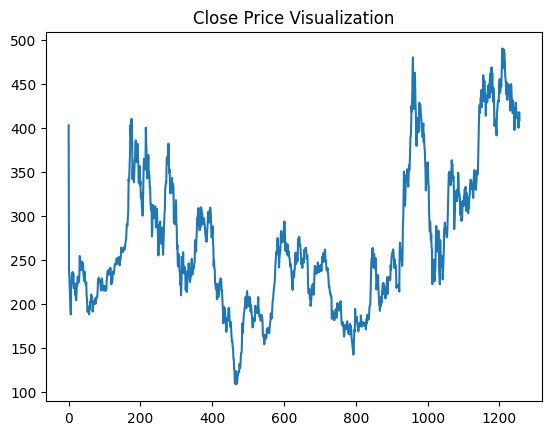

In [45]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

# Plotting moving averages of 100 day

---



Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

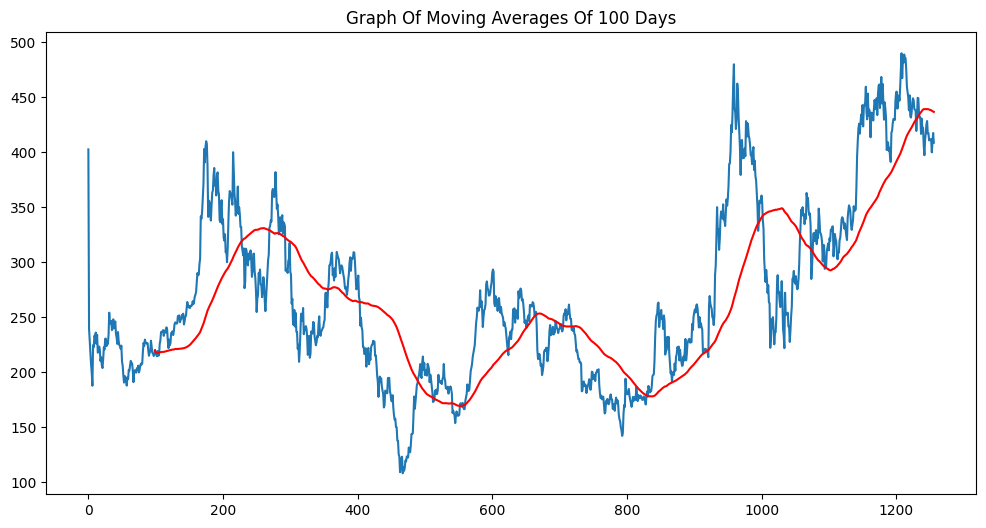

In [46]:
ma100 = df.Close.rolling(100).mean()
ma100

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [47]:
split_index = int(len(df) * 0.8)
train = df[:split_index]
test = df[split_index:]

In [48]:
train.head

<bound method NDFrame.head of         Open    High     Low   Close     Volume
0     402.94  407.12  398.11  402.51   56760900
1     230.04  239.67  228.35  239.48   81408600
2     239.43  240.37  228.33  228.81   71196600
3     229.33  233.57  217.24  217.73   90624000
4      218.6  222.82  200.00  207.15  197758500
...      ...     ...     ...     ...        ...
1000     354  367.34  353.67  360.56   67094400
1001  361.51  362.30  348.00  354.40   45965400
1002  353.44  354.98  334.42  337.80   74058600
1003  338.14  342.40  324.70  330.53   76052300
1004  327.02  328.89  297.25  302.80  134228800

[1004 rows x 5 columns]>

In [49]:
test.head

<bound method NDFrame.head of         Open    High     Low   Close     Volume
1005  303.71  309.00  288.04  290.80  100118300
1006  291.16  297.23  280.88  281.95  101748200
1007   279.5  293.88  273.60  292.98  115697000
1008  300.34  303.94  277.30  284.65  115551400
1009  270.93  284.35  261.84  272.04  126706600
...      ...     ...     ...     ...        ...
1252   408.3  414.70  405.50  411.82   57912200
1253  407.29  407.70  394.04  399.83   69680000
1254   399.5  410.82  397.64  409.38   58579500
1255  412.15  420.34  412.15  417.40   54809700
1256  414.42  416.81  403.66  408.58   53602500

[252 rows x 5 columns]>

# Using MinMax scaler for normalization of the dataset

---



In [50]:
scaler = MinMaxScaler(feature_range=(0,1))

train_close = train.iloc[:, 3:4].values
test_close = test.iloc[:, 3:4].values

train_close

array([[402.51],
       [239.48],
       [228.81],
       ...,
       [337.8 ],
       [330.53],
       [302.8 ]], shape=(1004, 1))

In [51]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.79193566],
       [0.35340004],
       [0.32469873],
       ...,
       [0.61787175],
       [0.59831612],
       [0.52372498]], shape=(1004, 1))

In [52]:
data_testing_array = scaler.transform(test_close)
data_testing_array

array([[0.49144609],
       [0.46764041],
       [0.49731009],
       [0.47490316],
       [0.44098343],
       [0.45997418],
       [0.41787713],
       [0.415779  ],
       [0.30678395],
       [0.32945987],
       [0.37656015],
       [0.35662793],
       [0.38164407],
       [0.34944588],
       [0.31528405],
       [0.34366258],
       [0.34473854],
       [0.37822789],
       [0.45806434],
       [0.48429094],
       [0.44103723],
       [0.44391543],
       [0.41814612],
       [0.40633742],
       [0.43135356],
       [0.46981924],
       [0.42817947],
       [0.35326555],
       [0.33674952],
       [0.30600387],
       [0.44141382],
       [0.38815365],
       [0.38791156],
       [0.38801915],
       [0.39275339],
       [0.35896815],
       [0.35848397],
       [0.32117495],
       [0.34933828],
       [0.3836884 ],
       [0.40727889],
       [0.47571014],
       [0.47821175],
       [0.49475468],
       [0.46820529],
       [0.46379385],
       [0.48178933],
       [0.463

In [53]:
x_train = []
y_train = []
window_size = 100

for i in range(window_size, data_training_array.shape[0]):
    x_train.append(data_training_array[i-window_size:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train

array([[[0.79193566],
        [0.35340004],
        [0.32469873],
        ...,
        [0.28685173],
        [0.28865397],
        [0.30145793]],

       [[0.35340004],
        [0.32469873],
        [0.29489456],
        ...,
        [0.28865397],
        [0.30145793],
        [0.29677749]],

       [[0.32469873],
        [0.29489456],
        [0.26643533],
        ...,
        [0.30145793],
        [0.29677749],
        [0.29137078]],

       ...,

       [[0.39304928],
        [0.4098343 ],
        [0.41298149],
        ...,
        [0.66174414],
        [0.67909404],
        [0.66252421]],

       [[0.4098343 ],
        [0.41298149],
        [0.40327093],
        ...,
        [0.67909404],
        [0.66252421],
        [0.61787175]],

       [[0.41298149],
        [0.40327093],
        [0.37906176],
        ...,
        [0.66252421],
        [0.61787175],
        [0.59831612]]], shape=(904, 100, 1))

In [55]:
x_test = []
y_test = []

for i in range(window_size, data_testing_array.shape[0]):
    x_test.append(data_testing_array[i-window_size:i])
    y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [56]:
x_test.shape

(152, 100, 1)

# Training the ML model (LSTM)

---



In [57]:
class TrainingProgressCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs, progress_bar, output_area):
        super().__init__()
        self.epochs = epochs
        self.progress_bar = progress_bar
        self.output_area = output_area

    def on_epoch_end(self, epoch, logs=None):
        self.progress_bar.value = epoch + 1
        
        with self.output_area:
            self.output_area.clear_output(wait=True)
            print(f"Epoch {epoch+1}/{self.epochs}")
            print(f"Loss: {logs['loss']:.6f}")

In [58]:
def train_model(window_size, train_split, epochs):

    print("Preparing data...")

    split_index = int(len(df) * train_split)
    train = df[:split_index]
    test = df[split_index:]

    scaler = MinMaxScaler(feature_range=(0,1))

    train_close = train.iloc[:, 3:4].values
    test_close = test.iloc[:, 3:4].values

    data_training_array = scaler.fit_transform(train_close)
    data_testing_array = scaler.transform(test_close)

    # Create sequences
    x_train, y_train = [], []
    for i in range(window_size, len(data_training_array)):
        x_train.append(data_training_array[i-window_size:i])
        y_train.append(data_training_array[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_test, y_test = [], []
    for i in range(window_size, len(data_testing_array)):
        x_test.append(data_testing_array[i-window_size:i])
        y_test.append(data_testing_array[i, 0])
    x_test, y_test = np.array(x_test), np.array(y_test)

    print("Building model...")

    model = Sequential([
        tf.keras.Input(shape=(x_train.shape[1], 1)),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    print("Training model...")
    model.fit(
        x_train,
        y_train,
        epochs=epochs,
        verbose=1  # Shows built-in training progress
    )

    print("Training complete.")

    model.save("keras_model.h5")
    print("Model saved as keras_model.h5")

    joblib.dump(scaler, "scaler.save")
    print("Scaler saved as scaler.save")

    print("Generating predictions...")

    y_pred = model.predict(x_test, verbose=0)

    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1,1))

    print("Plotting results...")

    plt.figure(figsize=(10,5))
    plt.plot(y_test, label="Actual")
    plt.plot(y_pred, label="LSTM")

    plt.xlabel("Day")
    plt.ylabel("Price (USD)")
    plt.title("Stock Price Prediction")

    plt.legend()
    plt.show()

Preparing data...
Building model...
Training model...
Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0349
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0071
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0060
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0055
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0051
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0047
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0045
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0046
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0045
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0041
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0039
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0039
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0036
Epoch 15/20
27/27

Training complete.
Model saved as keras_model.h5
Scaler saved as scaler.save
Generating predictions...
Plotting results...


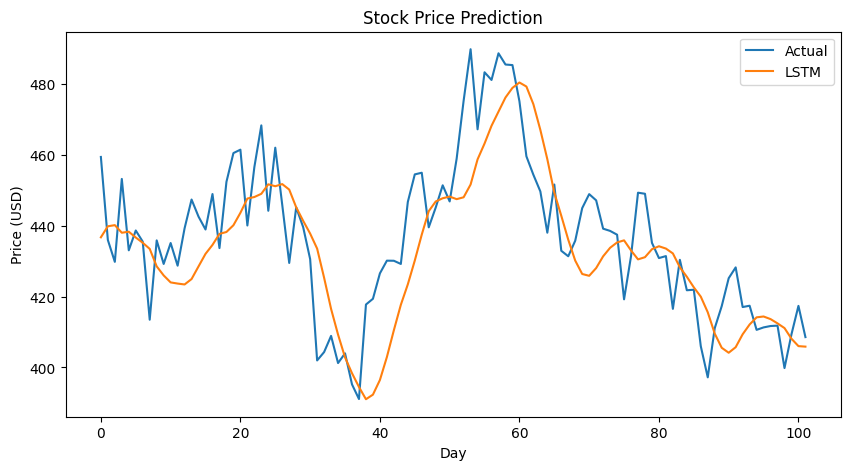

In [59]:
try:
    window_size = int(input("Enter window size (10–200): "))
    train_split = float(input("Enter train split (0.5–0.9): "))
    epochs = int(input("Enter number of epochs (5–50): "))

    # Optional: simple range check (no looping)
    if not (10 <= window_size <= 200):
        raise ValueError("Window size out of range.")
    if not (0.5 <= train_split <= 0.9):
        raise ValueError("Train split out of range.")
    if not (5 <= epochs <= 50):
        raise ValueError("Epochs out of range.")

    train_model(window_size, train_split, epochs)

except ValueError as e:
    print(f"Invalid input: {e}")
    print("Exiting program.")

Loading model and scaler...


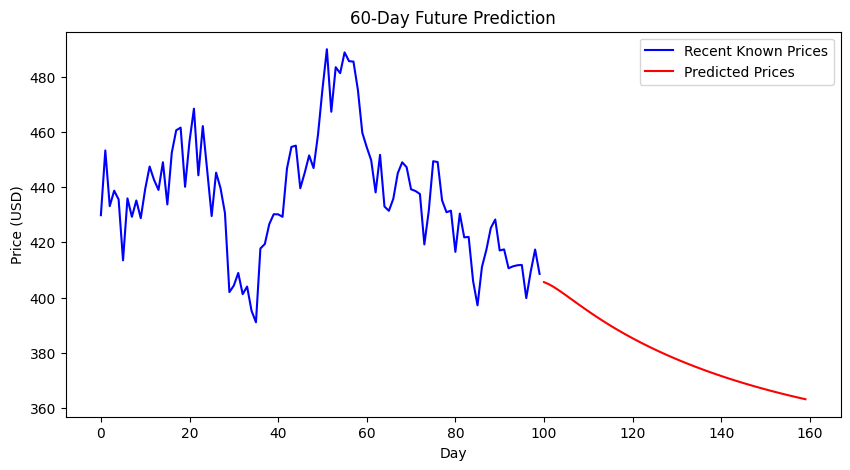

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from tensorflow.keras.models import load_model

days_ahead = int(input("Enter number of days to predict ahead: "))

model_path = "keras_model.h5"
scaler_path = "scaler.save"

if not os.path.exists(model_path):
    print("ERROR: keras_model.h5 not found. Train the model first.")
elif not os.path.exists(scaler_path):
    print("ERROR: scaler.save not found. Retrain model to save scaler.")
else:
    
    print("Loading model and scaler...")
    model = load_model(model_path)
    scaler = joblib.load(scaler_path)

    window_size = model.input_shape[1]

    close_prices = df[['Close']].values
    scaled_data = scaler.transform(close_prices)

    last_window = scaled_data[-window_size:]
    current_window = last_window.copy()

    predictions = []

    for _ in range(days_ahead):
        input_data = current_window.reshape(1, window_size, 1)
        next_pred = model.predict(input_data, verbose=0)

        predictions.append(next_pred[0, 0])

        # Slide window forward
        current_window = np.vstack((current_window[1:], next_pred))

    predictions = np.array(predictions).reshape(-1,1)
    predicted_prices = scaler.inverse_transform(predictions).flatten()

    previous_days = 100
    recent_known = close_prices[-previous_days:].flatten() if previous_days > 0 else np.array([])

    plt.figure(figsize=(10,5))

    x_known = range(len(recent_known))
    x_pred = range(len(recent_known), len(recent_known) + len(predicted_prices))

    if previous_days > 0:
        plt.plot(x_known, recent_known, color='blue', label="Recent Known Prices")

    plt.plot(x_pred, predicted_prices, color='red', label="Predicted Prices")

    plt.xlabel("Day")
    plt.ylabel("Price (USD)")
    plt.title(f"{days_ahead}-Day Future Prediction")
    plt.legend()
    plt.show()